# Miniproject 3

### Importing necessary libraries

In [ ]:
! pip install pyLDAvis
! pip install wordcloud

In [50]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt 
from gensim import corpora, models 
import pyLDAvis.gensim
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jaini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Loading the data

In [2]:
# Load data
path = 'Articles'
articles = []
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
        text = f.read()
        articles.append(text)

### Preprocessing of data

In [26]:
import os
import re
import nltk

# Load the data
data_dir = "Articles"
articles = []
for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename)) as f:
        articles.append(f.read())

# Split the data into individual articles
articles_split = []
for article in articles:
    articles_split.append(article.split("\n"))

# Clean up the corpus
for i, article in enumerate(articles_split):

    meta = article[0]
    # Remove metadata
    article = article[1:]

    # Remove punctuation marks
    article = re.sub(r'[^\w\s]', "", str(article))

    # Tokenize the text
    tokens = nltk.word_tokenize(article)

    # Remove stop words
    stop_words = nltk.corpus.stopwords.words("english")
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = [nltk.stem.WordNetLemmatizer().lemmatize(token) for token in tokens]

    # Store the cleaned article in the corpus
    articles_split[i] = lemmatized_tokens




### Feature Extraction

In [27]:
# Extract features
features = {}
for article in articles_split:
    for token in article:
        if token not in features:
            features[token] = 0
        features[token] += 1



### Summarizing the features

In [28]:
# Create summaries on the features
for feature, count in features.items():
    print(f"{feature}: {count}")



World: 703
Europe: 637
In: 3006
Turkey: 1044
US: 3629
Hand: 5
Is: 478
Seen: 19
Nearly: 57
Every: 99
Crisis: 44
By: 1952
TIM: 31
ARANGO: 25
1447: 4
word: 2032
4: 293
January: 492
2017: 3571
0945: 1
NYTimescom: 437
Feed: 518
NYTFEED: 429
English: 1718
Copyright: 1509
The: 15030
New: 3981
York: 3527
Times: 3401
Company: 1670
All: 2016
Rights: 1729
Reserved: 1620
ISTANBUL: 16
urkish: 2
official: 3223
accused: 307
United: 3386
States: 3254
abetting: 8
failed: 276
coup: 82
last: 1994
summer: 214
When: 901
Russian: 1105
ambassador: 181
assassinated: 15
month: 1610
Turkish: 532
press: 268
said: 11652
behind: 381
attack: 3443
And: 2384
gunman: 237
walked: 123
Istanbul: 164
nightclub: 67
early: 454
Year: 54
Day: 156
killed: 1650
dozen: 397
progovernment: 61
news: 1289
medium: 847
pointed: 112
finger: 38
merica: 31
Chief: 91
Suspectne: 1
headline: 90
blared: 6
On: 944
Twitter: 910
lawmaker: 178
referring: 141
name: 556
wrote: 450
hoever: 3
triggerman: 1
Reina: 7
act: 360
CIA: 164
Period: 6
confro

### Exploration of features

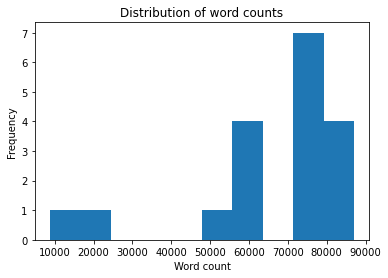

In [29]:
# Plot the distribution of word counts
plt.hist([len(article) for article in articles_split])
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.title("Distribution of word counts")
plt.show()

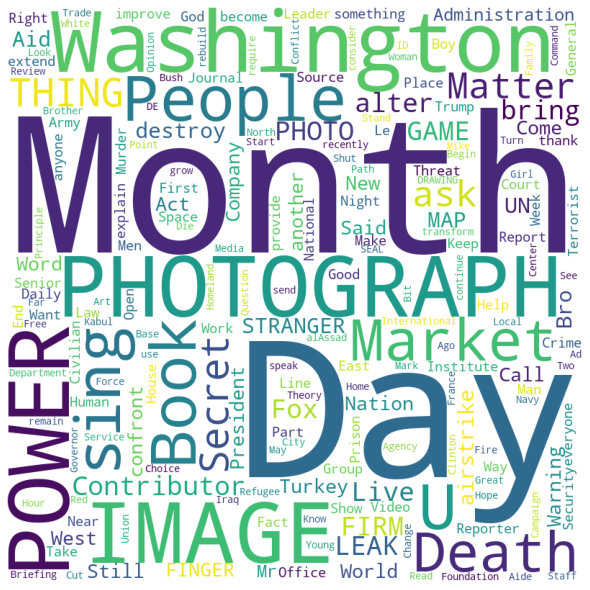

In [30]:
# Convert features dictionary to string for wordcloud
features_str = " ".join(features.keys())

# Create and display wordcloud
wordcloud = WordCloud(width=800, height=800, background_color="white", min_font_size=10).generate(features_str)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Topic Modelling

### Preprocessing before topic modelling

In [45]:
# Preprocess the documents by tokenizing and removing stop words
corpus = [[word for word in simple_preprocess(' '.join(doc)) if word not in stop_words] for doc in articles_split]

In [46]:
# Create dictionary and bag-of-words representation of corpus
dictionary = Dictionary(corpus)
bow_corpus = [dictionary.doc2bow(text) for text in corpus]


### Summary about the corpus

Number of documents: 18
Number of unique tokens: 45986
Number of total tokens: 1085440


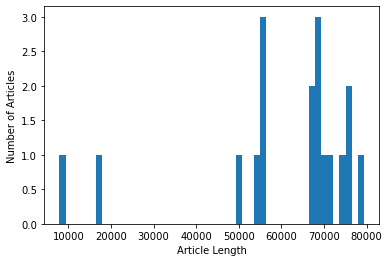

In [47]:
# Summarize corpus
print(f'Number of documents: {len(corpus)}')
print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of total tokens: {sum(len(text) for text in corpus)}')

# Plot distribution of article lengths
article_lengths = [len(text) for text in corpus]
plt.hist(article_lengths, bins=50)
plt.xlabel('Article Length')
plt.ylabel('Number of Articles')
plt.show()

### LDA Model development using gensim library

In [48]:
# Train LDA model on bag of words representation of documents
lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=10)

# Print topics and their most common words
for topic_num, topic_words in lda_model.print_topics():
    print("Topic {}: {}".format(topic_num, topic_words))


# Save model output to file
lda_model.save('lda_model')

# Reload saved model
lda_model = models.LdaModel.load('lda_model')


Topic 0: 0.011*"mr" + 0.010*"said" + 0.009*"trump" + 0.007*"new" + 0.006*"state" + 0.005*"united" + 0.005*"york" + 0.005*"islamic" + 0.005*"times" + 0.005*"president"
Topic 1: 0.002*"mr" + 0.002*"said" + 0.001*"state" + 0.001*"islamic" + 0.001*"trump" + 0.001*"new" + 0.001*"american" + 0.001*"force" + 0.001*"people" + 0.001*"attack"
Topic 2: 0.003*"said" + 0.002*"new" + 0.002*"mr" + 0.002*"state" + 0.001*"islamic" + 0.001*"trump" + 0.001*"one" + 0.001*"york" + 0.001*"president" + 0.001*"would"
Topic 3: 0.002*"new" + 0.002*"said" + 0.002*"mr" + 0.002*"one" + 0.002*"state" + 0.002*"times" + 0.001*"people" + 0.001*"islamic" + 0.001*"york" + 0.001*"would"
Topic 4: 0.010*"said" + 0.008*"new" + 0.006*"mr" + 0.005*"york" + 0.005*"times" + 0.005*"state" + 0.004*"one" + 0.004*"islamic" + 0.004*"would" + 0.004*"trump"
Topic 5: 0.010*"said" + 0.009*"mr" + 0.008*"us" + 0.008*"trump" + 0.007*"state" + 0.006*"islamic" + 0.005*"president" + 0.004*"official" + 0.004*"syria" + 0.004*"force"
Topic 6: 0.

### Re-running the topic modeling multiple times with different parameters and store summaries into output files



In [49]:
# Train LDA model on bag of words representation of documents with different parameters
lda_model_2 = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=5, id2word=dictionary, passes=5)
lda_model_3 = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=20, id2word=dictionary, passes=15)

# Print topics and their most common words for each model
for i, model in enumerate([lda_model, lda_model_2, lda_model_3]):
    print("Model with {} topics:".format(model.num_topics))
    for topic_num, topic_words in model.print_topics():
        print("Topic {}: {}".format(topic_num, topic_words))
        
    # Save model summary to file
    with open(f"model_{i+1}_summary.txt", "w") as f:
        f.write("Model with {} topics:\n".format(model.num_topics))
        for topic_num, topic_words in model.print_topics():
            f.write("Topic {}: {}\n".format(topic_num, topic_words))


Model with 10 topics:
Topic 0: 0.011*"mr" + 0.010*"said" + 0.009*"trump" + 0.007*"new" + 0.006*"state" + 0.005*"united" + 0.005*"york" + 0.005*"islamic" + 0.005*"times" + 0.005*"president"
Topic 1: 0.002*"mr" + 0.002*"said" + 0.001*"state" + 0.001*"islamic" + 0.001*"trump" + 0.001*"new" + 0.001*"american" + 0.001*"force" + 0.001*"people" + 0.001*"attack"
Topic 2: 0.003*"said" + 0.002*"new" + 0.002*"mr" + 0.002*"state" + 0.001*"islamic" + 0.001*"trump" + 0.001*"one" + 0.001*"york" + 0.001*"president" + 0.001*"would"
Topic 3: 0.002*"new" + 0.002*"said" + 0.002*"mr" + 0.002*"one" + 0.002*"state" + 0.002*"times" + 0.001*"people" + 0.001*"islamic" + 0.001*"york" + 0.001*"would"
Topic 4: 0.010*"said" + 0.008*"new" + 0.006*"mr" + 0.005*"york" + 0.005*"times" + 0.005*"state" + 0.004*"one" + 0.004*"islamic" + 0.004*"would" + 0.004*"trump"
Topic 5: 0.010*"said" + 0.009*"mr" + 0.008*"us" + 0.008*"trump" + 0.007*"state" + 0.006*"islamic" + 0.005*"president" + 0.004*"official" + 0.004*"syria" + 0.0

### Visualisation of topic modelling

In [51]:
# Visualize LDA model
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

# Save visualization to file
pyLDAvis.save_html(vis, 'lda_vis.html')



### Use below disply to visualise top 30 most relevant terms for topic based on your input value in selected topic also it provides the information for previous topic and next topic

Reference:
1. Topic model visualisation using pyLDAvis https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6

In [52]:
pyLDAvis.display(vis)

### Word Clouds for topic modelling

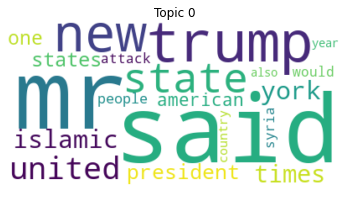

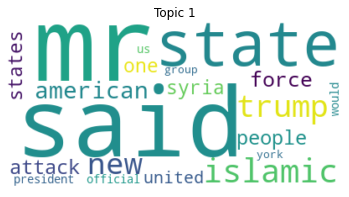

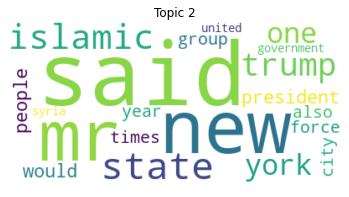

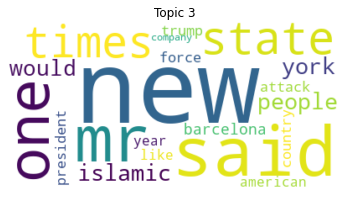

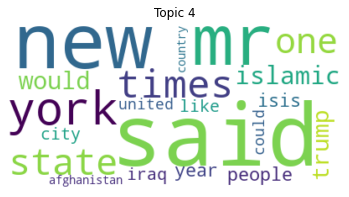

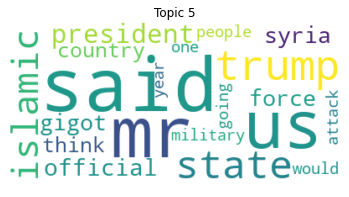

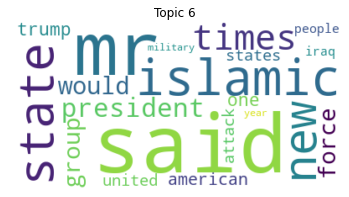

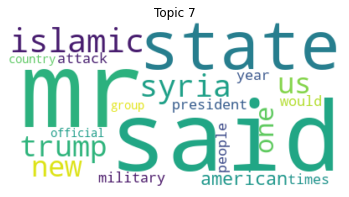

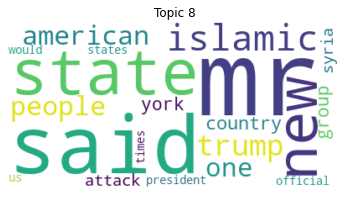

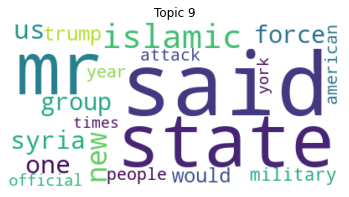

In [53]:
# Generate wordclouds for each topic
for topic_num in range(lda_model.num_topics):
    words = dict(lda_model.show_topic(topic_num, topn=20))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic {}".format(topic_num))
    plt.show()
